In [1]:
# Install required packages
!pip install --upgrade pip

# Core Deep Learning and FastAI
!pip install fastai==2.8.4 torch==2.8.0 torchvision==0.23.0

# Hugging Face ecosystem
!pip install transformers==4.40.2 datasets==2.13.1

# Notebook and visualization
!pip install jupyter ipywidgets matplotlib==3.7.2 pandas==2.2.3 scikit-learn==1.6.1 numpy==1.24.4

# Optional: for smoother notebook experience
!pip install gradio==4.31.5





  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.


In [2]:


import sys, fastai, torch, transformers, datasets, numpy, pandas, matplotlib, spacy, gradio

print("Python:", sys.version)
print("FastAI:", fastai.__version__)
print("PyTorch:", torch.__version__)
print("Transformers:", transformers.__version__)
print("Datasets:", datasets.__version__)
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("Matplotlib:", matplotlib.__version__)
print("spaCy:", spacy.__version__)
print("Gradio:", gradio.__version__)


Python: 3.10.12 (main, Aug 15 2025, 14:32:43) [GCC 11.4.0]
FastAI: 2.8.4
PyTorch: 2.8.0+cu128
Transformers: 4.40.2
Datasets: 2.13.1
NumPy: 1.24.4
Pandas: 2.2.3
Matplotlib: 3.7.2
spaCy: 3.8.7
Gradio: 4.31.5


In [3]:
# ============================
# 2️⃣ Import libraries
# ============================
from fastai.vision.all import *
import gradio as gr

# ============================
# 3️⃣ Load PETS dataset
# ============================
path = untar_data(URLs.PETS) / "images"

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(192)
)

# ============================
# 4️⃣ Train Model
# ============================
learn = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
learn.fine_tune(4)

# ============================
# 5️⃣ Export Model (Fastai .pkl)
# ============================
learn.export("model_pets_fastai.pkl")
print("✅ Model saved as model_pets_fastai.pkl")

# ============================
# 6️⃣ Test locally (optional)
# ============================
# img = PILImage.create(get_image_files(path)[0])
# pred, _, probs = learn.predict(img)
# print(pred, probs)

/home/husen/fastai310_env/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/home/husen/fastai310_env/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,0.215940,0.046697,0.019621,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.066185,0.029149,0.008796,00:30
1,0.056904,0.020144,0.010149,00:28
2,0.019679,0.010480,0.005413,00:28
3,0.009039,0.009409,0.003383,00:28


✅ Model saved as model_pets_fastai.pkl


In [7]:

learn.export("/mnt/c/WINDOWS/system32/fastai_project/cat-dog/model_fastai.pkl")


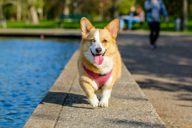

In [5]:
from fastai.vision.all import *
import gradio as gr
im=PILImage.create('dog.jpg')
im.thumbnail((192,192,))
im